In [1]:
import numpy as np
from stl import mesh as stlMesh
from mayavi import mlab
from mayavi.mlab import *

In [2]:
use3DEngine = False

if use3DEngine==True:
    mlab.init_notebook()
else:
    mlab.init_notebook('png')

Notebook initialized with png backend.


In [3]:
# Using an existing stl file:
#your_mesh = stlMesh.Mesh.from_file('STL/coca-cola.stl')
your_mesh = stlMesh.Mesh.from_file('STL/dragon.stl')

In [4]:
def getTriangles(mesh):
    mesh_size = len(mesh.x)
    return (np.arange(0,3*mesh_size)).reshape(int(mesh_size),3)

In [5]:
triangles = getTriangles(your_mesh)
[x,y,z] = your_mesh.x, your_mesh.y, your_mesh.z


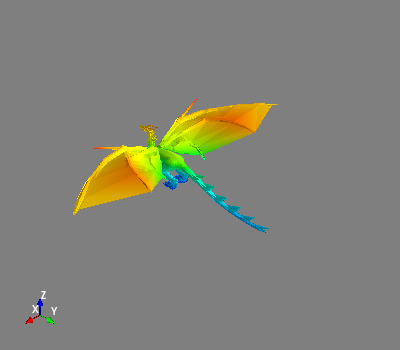

In [6]:
mlab.clf()
triangular_mesh(x, y, z, triangles)
orientation_axes()

### Apply Matrices

In [7]:
points = np.array([x.reshape(-1), y.reshape(-1), z.reshape(-1)])

In [8]:
### Scaling matrix
scale = np.array([[1,0,0],[0,1,0],[0,0,3]])

### Rotation matrix
theta = np.pi/2
Rx = np.array([[1, 0, 0], [0, np.cos(theta), -np.sin(theta)], [0 , np.sin(theta), np.cos(theta)]])

### Get transformation matrix
T = scale@Rx

In [9]:
new_points = T@points


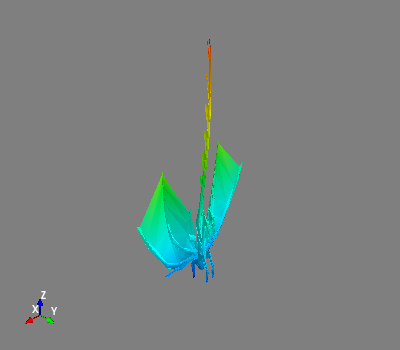

In [10]:
mlab.clf()  # Clear the figure
triangular_mesh(new_points[0,:],
                new_points[1,:],
                new_points[2,:],
                triangles, reset_zoom=True)#, scalars=np.random.rand(len(your_mesh.x)))
orientation_axes()

### Proyecciones en Perspectiva

In [11]:
points_homogeneous = np.append(points, np.ones([1,(points.shape)[1]]), axis=0)

d = 105
P = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 0, 0], 
              [0, 0, -1/d, 1]])

In [12]:
projection = P@points_homogeneous


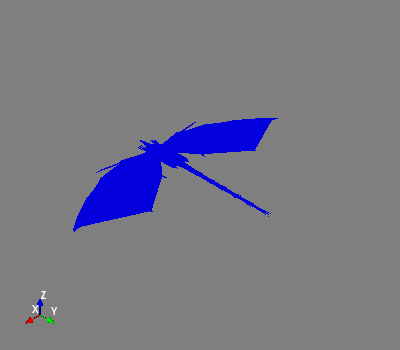

In [13]:
mlab.clf()  # Clear the figure
triangular_mesh(projection[0,:],
                projection[1,:],
                projection[2,:],
                triangles, reset_zoom=True)#, scalars=np.random.rand(len(your_mesh.x)))
orientation_axes()